# Iris Flower Classification 

**Goal:** Predict `species` from `sepal_length`, `sepal_width`, `petal_length`, `petal_width`.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

df = pd.read_csv(url)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Problem Framing

**Type:** Multiclass classification (3 classes: setosa, versicolor, virginica)  
**Why this dataset:** Small, balanced, no missing values — ideal for learning + showcasing full ML workflow.

**Questions**
1. Which features separate the classes best?
2. Which simple model gives the most reliable performance?
3. Are petal measurements sufficient to classify accurately?


In [2]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
17,5.1,3.5,1.4,0.3,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#Checking for class imbalance
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

**Class Distribution:**
- setosa: 50
- versicolor: 50
- virginica: 49  
> Classes are nearly perfectly balanced; no re-sampling required.


In [9]:
# Numerical classes:
df_num = df.select_dtypes(include=[np.number]).columns.tolist()
# Categorical classes:
df_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [10]:
print("Numerical columns:", df_num)
print("Categorical columns:", df_cat)

Numerical columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Categorical columns: ['species']


# Univariate Analysis

### Numerical Variables

For numeric features, we typically use:
- **Histograms** → show frequency distribution, range, skewness, modality.
- **KDE plots** → smooth curve of the distribution, shows probability density.
- **Boxplots** → highlight median, spread, and outliers.
- **Violin plots** → combine distribution shape (KDE) with summary stats (boxplot).

These help understand the feature’s distribution and detect patterns or anomalies before modeling.

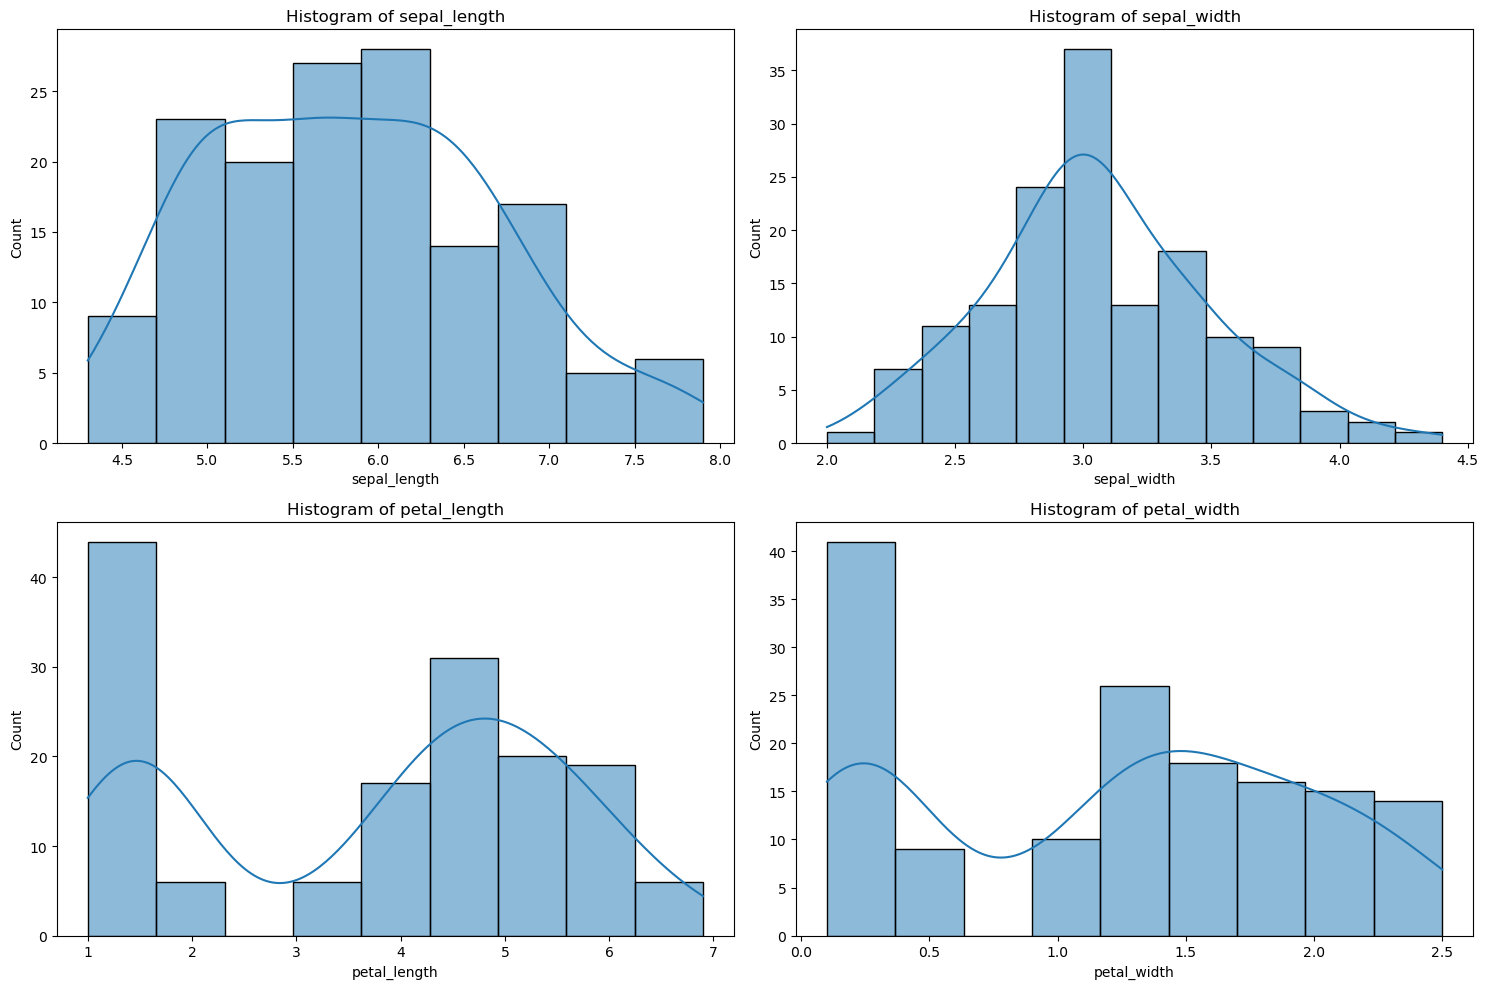

In [11]:


import math


n_cols  = 2
n_rows = math.ceil(len(df_num) / 3)

fig,axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axes.flatten()

for i, col in enumerate(df_num):
    if col in df_num:
        sns.histplot(df[col], ax=axs[i], kde=True)
        axs[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axs)):
    axs[j].axis('off')  # Turn off unused subplots

    
plt.tight_layout()
plt.show()


## Univariate Analysis — Numeric Features

### 1. Sepal Length
- **Range:** ~4.3 cm to 7.9 cm  
- **Most common range:** 5.5 cm – 6.5 cm  
- Few flowers have exceptionally long sepals (> 7 cm).

### 2. Sepal Width
- **Range:** ~2.0 cm to 4.4 cm  
- **Most common range:** 2.8 cm – 3.2 cm  
- Slight right skew — fewer flowers have very narrow (< 2.5 cm) or very wide (> 3.5 cm) sepals.

### 3. Petal Length
- **Range:** ~1.0 cm to 6.9 cm  
- **Clear bimodal distribution** — short petals (~1.0–2.0 cm) vs. long petals (~4.0–6.0 cm)  
- Indicates petal length may be a strong class separator.

### 4. Petal Width
- **Range:** ~0.1 cm to 2.5 cm  
- Also **bimodal** — narrow petals (~0.1–0.6 cm) and wider petals (~1.0–2.0 cm)  
- Suggests petal width could also strongly distinguish species.


## Categorical Variables

For categorical features, we typically use:
- **Bar plots / Count plots** → show frequency of each category.
- **Pie charts** → display proportion of each category (less used in professional EDA).
- **Frequency tables** → quick numeric summary of category counts.
- **Stacked bar charts** (optional) → compare category distribution across another variable.

These help understand class balance, identify rare categories, and detect potential grouping needs before modeling.

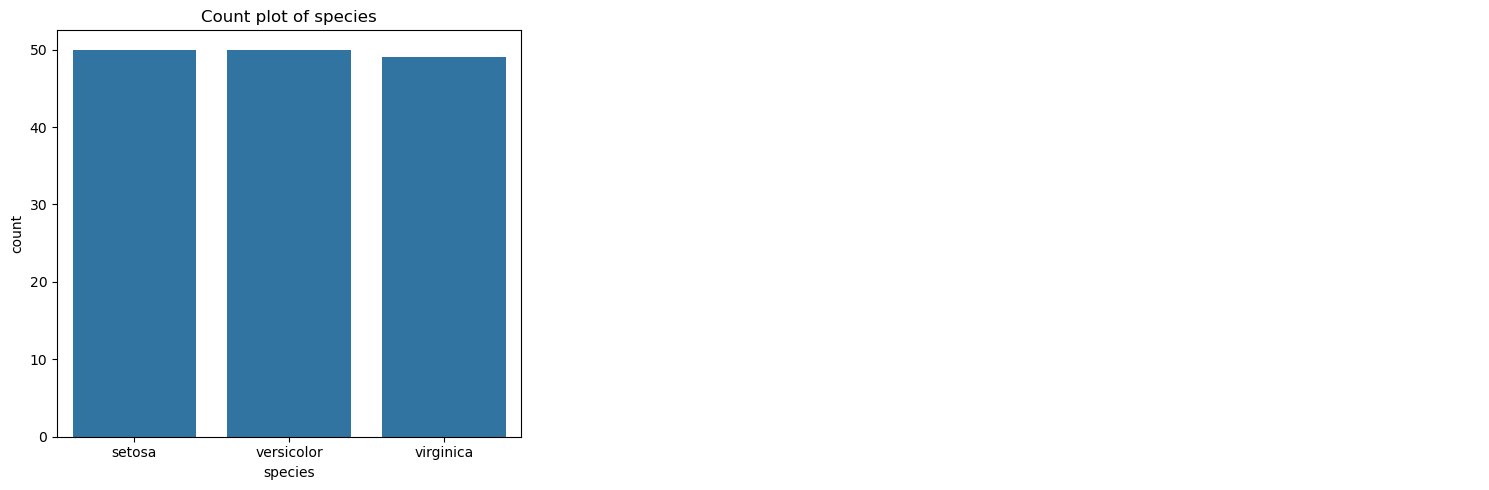

In [12]:
n_cols = 3
n_rows = math.ceil(len(df_cat) / n_cols)

fig,axes = plt.subplots(n_rows,n_cols, figsize = (n_cols * 5, n_rows * 5))
axs = axes.flatten()

for i, col in enumerate(df_cat):
    
    sns.countplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'Count plot of {col}')


for j in range(i+1,len(axs)):
    axs[j].axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()


### Categorical Variable — `species`

- **Classes:** setosa, versicolor, virginica
- **Distribution:** 
  - setosa: 50 samples
  - versicolor: 50 samples
  - virginica: 49 samples
- **Observation:**  
  The classes are almost perfectly balanced, with only a 1-sample difference between the largest and smallest class.  
  This means no resampling (oversampling/undersampling) is required for modeling, and evaluation metrics like accuracy will not be biased by class imbalance.


# Bivariate Analysis

###  Numerical vs Numerical
Common plots:

 - `Scatter plot` → see correlation & separation of classes

 - `Pair plot` → all scatter combinations

 - `Correlation` heatmap → numeric association strength

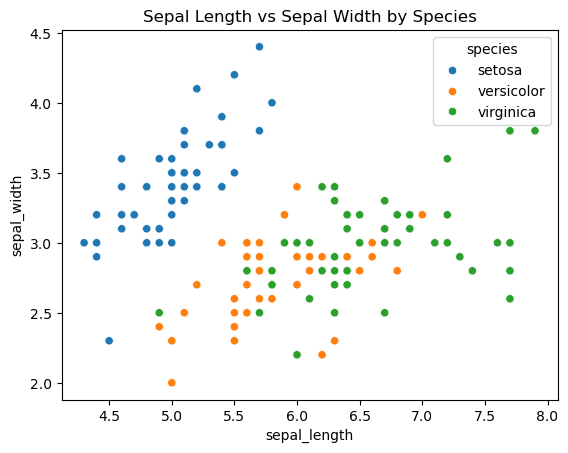

In [13]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

### Bivariate Analysis — Sepal Length vs Sepal Width

- **Species separation:**  
  - *Setosa* is well-separated from the other two species, occupying the region of shorter sepal lengths and larger sepal widths.  
  - *Versicolor* and *Virginica* overlap significantly in this feature space, making them harder to distinguish using only sepal length and width.

- **Trends:**
  - Sepal length tends to increase slightly as sepal width decreases for *Versicolor* and *Virginica*.
  - *Setosa* shows more variation in sepal width but stays within a shorter sepal length range.

- **Inference:**  
  Sepal length and width together are **partially useful** for classification, but they are not as strong at separating all three species compared to petal measurements.


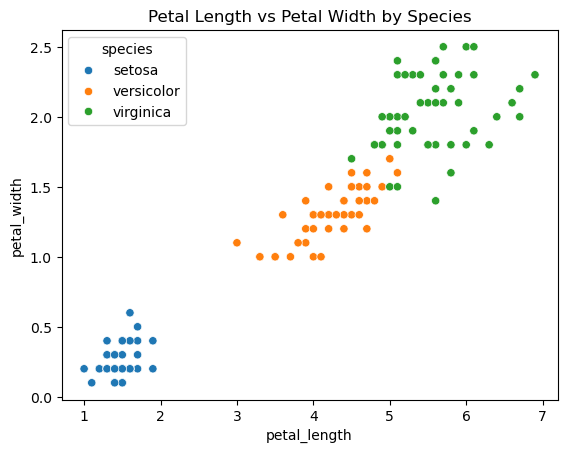

In [15]:
sns.scatterplot(data=df,x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs Petal Width by Species')
plt.show()

### Bivariate Analysis — Petal Length vs Petal Width

- **Species separation:**  
  - All three species are **almost perfectly separable** in this feature space.  
  - *Setosa* occupies a distinct cluster with the smallest petal lengths and widths.  
  - *Versicolor* and *Virginica* form separate, non-overlapping clusters along the petal size axis.

- **Trends:**  
  - Petal length and width are strongly positively correlated across all species.  
  - The slope of the relationship appears similar for *Versicolor* and *Virginica*, but the ranges are shifted.

- **Inference:**  
  Petal measurements are **highly discriminative features** and will likely be the strongest predictors in classification models for this dataset.


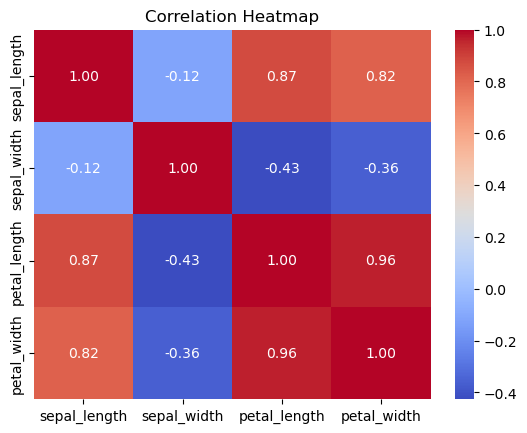

In [17]:
x = df.drop('species', axis=1)
y = df['species']
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Bivariate Analysis — Correlation Heatmap

- **Strongest correlations:**
  - Petal length and petal width show an extremely high positive correlation (**0.96**).
  - Sepal length is also strongly correlated with petal length (**0.87**) and petal width (**0.82**).

- **Weak/Negative correlations:**
  - Sepal width has very weak correlation with sepal length (**-0.12**) and moderate negative correlation with petal length (**-0.43**) and petal width (**-0.36**).

- **Inference:**
  - Petal measurements are not only highly correlated with each other but also strongly related to sepal length.
  - Sepal width behaves differently from the other features and may not be as useful for separating species on its own.


**Overall Insights:**
- Petal measurements dominate in separating species.
- Sepal width is the least correlated with other features and has limited discriminative power.
- Feature selection and importance analysis during modeling will likely confirm petal features as the primary drivers.

# Distribution Visualisation

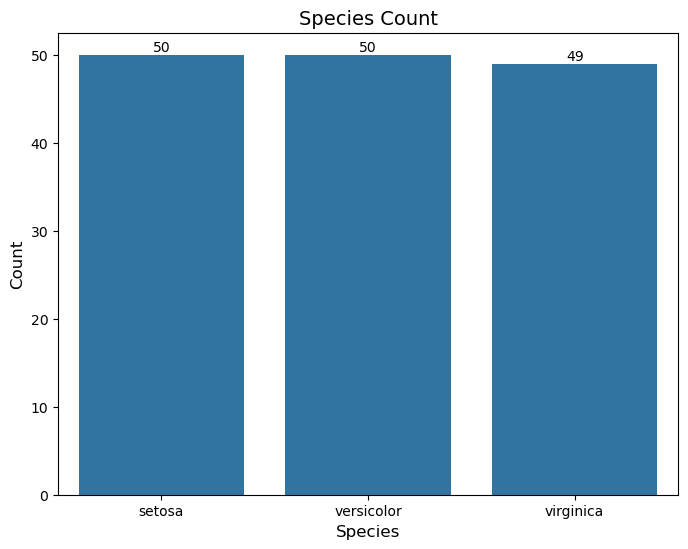

In [23]:
counts = df['species'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='species', data=df)
plt.title("Species Count", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add counts above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


### Target Variable Distribution — `species`

- **Classes:** setosa, versicolor, virginica  
- **Counts:**  
  - setosa → 50 samples  
  - versicolor → 50 samples  
  - virginica → 49 samples  

**Observation:**  
The dataset is **almost perfectly balanced**, with only a 1-sample difference between the largest and smallest class.  
This balance means that:
- Accuracy will be a reliable evaluation metric (no strong class imbalance to bias results).  
- No oversampling or undersampling is necessary during preprocessing.


## Modeling
In this section, we will build and evaluate classification models to predict the `species` of Iris flowers based on their sepal and petal measurements.

>**Goal:**  
Identify a simple yet effective classification model achieving high accuracy and robust generalization on unseen data.


1. **Train/Test Split** — Divide the dataset into training and test sets while preserving class proportions.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(" X_train  Shape:", X_train.shape)
print(" y_train Shape:",  y_train.shape)


 X_train  Shape: (119, 4)
 y_train Shape: (119,)


2. **Feature Scaling** — Standardize numeric features for algorithms sensitive to feature scales (e.g., Logistic Regression, KNN).


In [35]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame( scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test_scaled = pd.DataFrame( scaler.transform(X_test),
                               columns=X_test.columns,
                               index=X_test.index)

print(X_train_scaled[:2])  # Display 2 rows of scaled training data
print(X_test_scaled[:2])  # Display 2 rows of scaled training data

     sepal_length  sepal_width  petal_length  petal_width
6       -1.501587     0.769031     -1.339093    -1.179737
128      0.639824    -0.586742      1.041834     1.186365
    sepal_length  sepal_width  petal_length  petal_width
69     -0.311914    -1.264629      0.078126    -0.128136
66     -0.311914    -0.134818      0.418258     0.397664


---
3. **Baseline Model Training** — Train three classic algorithms:
   - Logistic Regression
   - K-Nearest Neighbors (KNN)
   - Decision Tree Classifier

#### Logistic Regression model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and fit model
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)


print("Classification Report For Logistic Regression :\n", 
      classification_report(y_test, y_pred_log_reg))

Classification Report For Logistic Regression :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### KNN - K Nearest Neighbour Classifier Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("Classification Report For KNN :\n", classification_report(y_test, y_pred_knn))

Classification Report For KNN :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### Decision Tree Classifier Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train)

y_pred_dtree = dtree.predict(X_test_scaled)

print("Classification Report For Decision Tree Classifier :\n", classification_report(y_test, y_pred_dtree))


Classification Report For Decision Tree Classifier :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



4. **Evaluation** — Compare models using accuracy, confusion matrix, and classification report.


#### Baseline Model Results Summary

We trained three classic classification algorithms on the Iris dataset and evaluated their performance on the test set.  
The table below summarizes the accuracy scores:

| Model                        | Accuracy | Macro Avg F1-Score | Notes |
|------------------------------|----------|--------------------|-------|
| Logistic Regression          | 0.93     | 0.93               | Strong performance across all classes |
| K-Nearest Neighbors (KNN)    | 0.93     | 0.93               | Perfect recall for *versicolor*, slightly lower recall for *virginica* |
| Decision Tree Classifier     | **0.97** | **0.97**           | Highest overall accuracy, perfect classification for *setosa* and *virginica* |

**Observations:**
- All models perform well, with accuracies above 93%.
- The **Decision Tree Classifier** achieved the best overall accuracy (97%), showing strong ability to capture class boundaries.
- Logistic Regression and KNN performed similarly, with KNN showing slightly better recall for *versicolor* but lower recall for *virginica*.
- *Setosa* was perfectly classified by all models, indicating it is the easiest to distinguish in the dataset.
---

5. **Model Selection** — Choose the best-performing model for further analysis.

- Based on the baseline evaluation, the **Decision Tree Classifier** achieved the highest accuracy (97%) and the highest macro average F1-score among all tested models.  
It also demonstrated perfect classification for *setosa* and *virginica*, with only a slight misclassification in *versicolor*.
>**Decision Tree Classifier** — chosen for its superior performance and interpretability.



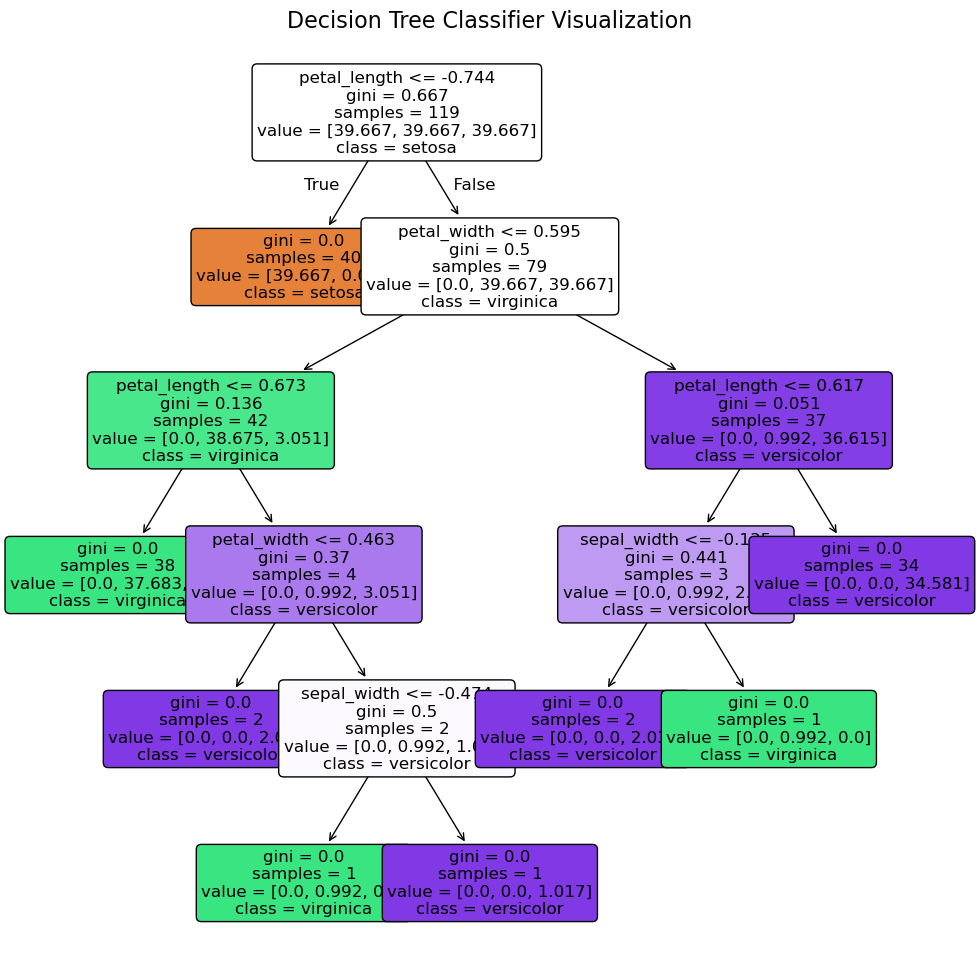

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 12))
plot_tree(
    dtree,
    feature_names=X_train.columns,
    class_names = y_train.unique(),
    filled=True,
    rounded=True,
    fontsize=12 
)

plt.title("Decision Tree Classifier Visualization", fontsize=16)
plt.show()

## **Conclusion**

In this project, we explored the **Iris dataset** to develop a machine learning model that classifies iris flowers into three species: *Setosa*, *Versicolor*, and *Virginica* based on sepal and petal measurements.

### **Key Insights from EDA**
- **Petal measurements** (length and width) provide the clearest separation between species.
- *Setosa* is linearly separable from the other two species, while *Versicolor* and *Virginica* exhibit partial overlap.
- Sepal features are less effective in distinguishing species compared to petal features.
---
### **Modeling Outcomes**
We trained and evaluated three baseline models:
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree Classifier**

The **Decision Tree Classifier** achieved the highest performance:
- **Accuracy:** 97% on the test set.
- Identified **petal length** and **petal width** as the most influential features.
---
### **Applications**
This model can be useful in:
- **Botanical research** for quick species classification.
- **Agriculture** to automate plant identification.
- **Education** as a demonstration of basic classification algorithms.



